# 경쟁사 고객 리뷰 분석으로 소비자 인식 조사 
영양제 브랜드 자사와 경쟁사의 구매 후기를 분석해서 소비자들의 인식을 조사해봅니다. 

## 데이터 설명
데이터는 다음의 링크에서 다운받으실 수 있습니다.


---

* [센트룸 구매후기](https://drive.google.com/file/d/1eeTHELYDR0UW9CK7yODGhcUGylTfpLv4/view?usp=sharing)
*  [세노비스 카페 데이터](https://drive.google.com/file/d/1798xQJmU2rIlqiLyoUcIhelGV9szjLUu/view?usp=sharing)
* [센트룸 카페 데이터](https://drive.google.com/file/d/1RFYWzhrMGongGVMIEvs1gaMOi-PmAfuz/view?usp=sharing)

---


# 텍스트 마이닝을 위한 전처리 
## KoNLP를 이용한 형태소 분석 
- KoNLPy가 제공하는 형태소분석기 중 하나인 Kkma를 사용합니다.
- 자세한 내용은 http://konlpy.org/ko/v0.4.3/morph/ 참조

In [0]:
# KoNLPy 라이브러리 설치. 최초 1회만 실행
!pip install konlpy

# 형태소 분석기
- 한나눔 http://semanticweb.kaist.ac.kr/hannanum/index.html
- 트위터 https://github.com/twitter/twitter-korean-text
- 꼬꼬마 http://kkma.snu.ac.kr/documents/

## 형태소분석기의 성능차이
![대체 텍스트](http://konlpy.org/ko/v0.4.2/_images/time.png)
* 출처: http://konlpy.org/ko/v0.4.2/morph/

In [1]:
from konlpy.tag import Hannanum
from konlpy.tag import Twitter
from konlpy.tag import Kkma
hannanum=Hannanum()
twitter=Twitter()
kkma = Kkma()

/home/ubuntu/.local/lib/python3.6/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 꼬꼬마 형태소 분석기 
- 문장을 형태소 단위로 분리하고 품사를 태깅합니다
- 품사태그는 일반명사(NNG), 고유명사(NNP), 동사(VV), 형용사(VA) 등이 있습니다
- http://kkma.snu.ac.kr/documents/index.jsp?doc=postag 형태소 리스트를 확인

In [4]:
print(kkma.sentences(u'아버지가 방에 들어가셨다. 아버지 가방에 들어가셨다. 아버지가 방 안에 있는 가방에 들어가셨다.'))

['아버지가 방에 들어가셨다.', '아버지 가방에 들어가셨다.', '아버지가 방 안에 있는 가방에 들어가셨다.']


In [5]:
print(kkma.pos(u'아버지가 방에 들어가셨다. 아버지 가방에 들어가셨다. 아버지가 방 안에 있는 가방에 들어가셨다.'))

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('안', 'NNG'), ('에', 'JKM'), ('있', 'VV'), ('는', 'ETD'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


### 한나눔 형태소 분석기

In [6]:
print(hannanum.pos(u'아버지가 방에 들어가셨다. 아버지 가방에 들어가셨다. 아버지가 방 안에 있는 가방에 들어가셨다.'))

[('아버지', 'N'), ('가', 'J'), ('방', 'N'), ('에', 'J'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('셨다', 'E'), ('.', 'S'), ('아버지', 'N'), ('가방', 'N'), ('에', 'J'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('셨다', 'E'), ('.', 'S'), ('아버지', 'N'), ('가', 'J'), ('방', 'N'), ('안', 'N'), ('에', 'J'), ('있', 'P'), ('는', 'E'), ('가방', 'N'), ('에', 'J'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('셨다', 'E'), ('.', 'S')]


### 트위터 형태소 분석기

In [7]:
print(twitter.pos('아버지가 방에 들어가셨다. 아버지 가방에 들어가셨다. 아버지가 방 안에 있는 가방에 들어가셨다.'))

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가셨다', 'Verb'), ('.', 'Punctuation'), ('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가셨다', 'Verb'), ('.', 'Punctuation'), ('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('안', 'Noun'), ('에', 'Josa'), ('있는', 'Adjective'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가셨다', 'Verb'), ('.', 'Punctuation')]


# 텍스트 마이닝 분석 및 시각화
* 센트룸 데이터를 먼저 분석해봅니다. 

### 데이터 탐색 및 전처리

In [0]:
# 데이터를 불러옵니다.
from google.colab import files
uploaded = files.upload()

In [2]:
# 형태소분석 - kkma 명사 
line_list = []
f = open("data/centrum_review.txt", encoding="utf-8")
for line in f:
    line = kkma.nouns(line)
    line_list.append(line)
f.close()

print("- 불러온 문서 :", len(line_list), "문장")

- 불러온 문서 : 102 문장


In [4]:
line_list[1]

['일반', '약국', '약', '신중', '선택', '겠죠', '부부', '기운', '감사']

In [53]:
word_frequency = {} # 단어 빈도 분석
noun_list = []      # 
#불용어 리스트를 여기에 추가합니다.
stop_list = ["배송", "만족", "구매", "감사", "번째"]
line_number = 0
for line in line_list[:]:
    line_number += 1
    print(str(line_number) + "/" + str(len(line_list)), end="\r")
    noun = []
    for word in line:
        if word.split("/")[0] not in stop_list and len(word.split("/")[0]) > 1:  
            noun.append(word.split("/")[0])
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
    noun_list.extend(noun)

In [54]:
#단어별 출현빈도를 출력합니다.
word_count = []
for n, freq in word_frequency.items():
    word_count.append([n, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)
for n, freq in word_count[:10]:
    print(n + "\t" + str(freq))

비타민	7
추천	5
건강	4
가격	4
적극	3
피곤	3
이용	3
제품	3
포장	3
효과	3


In [8]:
#추출한 명사 리스트를 활용해 명사만으로 이루어진 문서를 생성합니다.
noun_doc = ' '.join(noun_list)
noun_doc = noun_doc.strip()

* 서체 다운로드 
- 시각화에서 서체 변경만으로도 완성도를 높일 수 있습니다. 
- [다음의 링크](https://drive.google.com/file/d/1ULZI7vTml7mVVrM3fbo4AW8xhyETDETx/view?usp=sharing)에서 나눔스퀘어 서체를 다운로드 받아주세요. 
- 참고: https://hangeul.naver.com/2017/nanum

In [46]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

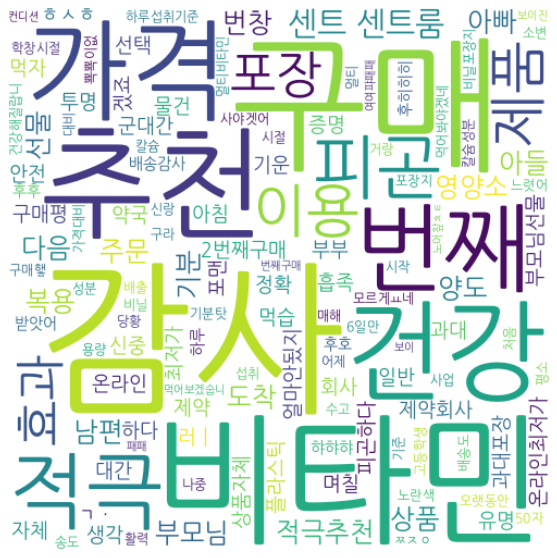

In [55]:
#워드클라우드 파라미터 설정
#font_path="NanumSquareB.otf"  #폰트
font_path=r'/home/ubuntu/study_list/Fast campus/Marketing Analysis/data/NanumGothic.otf'
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
# 데이터를 불러옵니다.
from google.colab import files
uploaded = files.upload()

In [56]:
# 형태소분석 - kkma 명사 
line_list = []
f = open("data/centrum2.txt", encoding="utf-8")
for line in f:
    line = kkma.nouns(line)
    line_list.append(line)
f.close()

print("- 불러온 문서 :", len(line_list), "문장")

- 불러온 문서 : 2000 문장


In [57]:
word_frequency = {}
noun_list = []
#불용어 리스트를 여기에 추가합니다.
stop_list = ["배송", "만족", "카페", "카페규정", "확인", "주수", "센트"]
line_number = 0
for line in line_list[:]:
    line_number += 1
    print(str(line_number) + "/" + str(len(line_list)), end="\r")
    noun = []
    for word in line:
        if word.split("/")[0] not in stop_list and len(word.split("/")[0]) > 1:  
            noun.append(word.split("/")[0])
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
    noun_list.extend(noun)

In [58]:
#단어별 출현빈도를 출력합니다.
word_count = []
for n, freq in word_frequency.items():
    word_count.append([n, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)
for n, freq in word_count[:10]:
    print(n + "\t" + str(freq))

센트룸	1841
비타민	786
임신	344
영양제	342
종합	310
엽산	250
추천	246
철분	221
종합비타민	199
보건소	196


In [59]:
#추출한 명사 리스트를 활용해 명사만으로 이루어진 문서를 생성합니다.
noun_doc = ' '.join(noun_list)
noun_doc = noun_doc.strip()

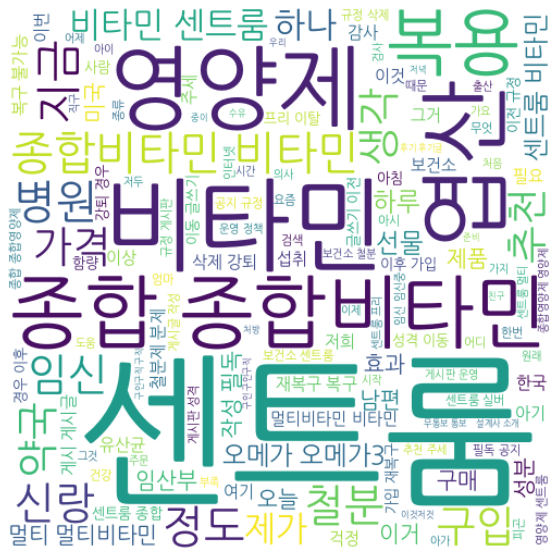

In [60]:
#워드클라우드 파라미터 설정
font_path=r'/home/ubuntu/study_list/Fast campus/Marketing Analysis/data/NanumGothic.otf'  #폰트
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### LDA 토픽 모델링

In [64]:
import gensim
from gensim import corpora
import logging
logging.basicConfig(level=logging.DEBUG)
topic = 5
keyword = 10
texts = []
resultList = []
stop_list = ["배송", "만족", "카페", "카페규정", "확인", "주수", "센트"]
for line in line_list:
    words = line
    if words != [""]:
        tokens = [word for word in words if (len(word.split("/")[0]) > 1 and word.split("/")[0] not in stop_list)]
        texts.append(tokens)
dictionary = corpora.Dictionary(texts)    
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=10)
for num in range(topic):
    resultList.append(ldamodel.show_topic(num, keyword))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<10095 unique tokens: ['16', '16주', '3개월분', '3일', '개월']...> from 2000 documents (total 46593 corpus positions)
DEBUG:gensim.utils:starting a new internal lifecycle event log for Dictionary
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<10095 unique tokens: ['16', '16주', '3개월분', '3일', '개월']...> from 2000 documents (total 46593 corpus positions)", 'datetime': '2022-06-11T06:58:42.352992', 'gensim': '4.2.0', 'python': '3.6.9 (default, Mar 15 2022, 13:55:28) \n[GCC 8.4.0]', 'platform': 'Linux-5.4.0-1071-aws-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 5 topics, 10 passes over the supp

INFO:gensim.models.ldamodel:topic diff=0.147862, rho=0.408248
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-8.157 per-word bound, 285.5 perplexity estimate based on a held-out corpus of 2000 documents with 46593 words
INFO:gensim.models.ldamodel:PROGRESS: pass 5, at document #2000/2000
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:1952/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.058*"센트룸" + 0.025*"비타민" + 0.007*"종합" + 0.007*"멀티" + 0.006*"멀티비타민" + 0.005*"종합비타민" + 0.005*"구입" + 0.005*"엽산" + 0.004*"신랑" + 0.004*"임신"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.017*"센트룸" + 0.008*"비타민" + 0.007*"보건소" + 0.007*"철분" + 0.006*"임신" + 0.006*"개월" + 0.005*"임산부" + 0.004*"영양제" + 0.004*"엽산" + 0.004*"100"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.032*"센트룸" + 0.016*"비타민" + 0.010*"영양제" + 0.009*"종합" + 0.008*"임신" +

In [65]:
resultList

[[('센트룸', 0.0637482),
  ('비타민', 0.027444622),
  ('종합', 0.0076805926),
  ('멀티', 0.007046685),
  ('종합비타민', 0.0064662904),
  ('멀티비타민', 0.006127718),
  ('구입', 0.005701649),
  ('신랑', 0.005002593),
  ('감사', 0.004477956),
  ('엽산', 0.004284866)],
 [('센트룸', 0.016390732),
  ('비타민', 0.0077611976),
  ('철분', 0.0074930876),
  ('보건소', 0.0074157696),
  ('임신', 0.0065225083),
  ('개월', 0.006502352),
  ('임산부', 0.0055884575),
  ('엽산', 0.0042090933),
  ('영양제', 0.0040106266),
  ('100', 0.0039564427)],
 [('센트룸', 0.030462846),
  ('비타민', 0.0153515),
  ('영양제', 0.009741041),
  ('임신', 0.008455685),
  ('종합', 0.008165437),
  ('게시판', 0.006589991),
  ('규정', 0.006536088),
  ('추천', 0.005984226),
  ('엽산', 0.0053806477),
  ('게시', 0.0047922046)],
 [('센트룸', 0.04183557),
  ('비타민', 0.015688075),
  ('영양제', 0.01033939),
  ('임신', 0.008607283),
  ('보건소', 0.0072240317),
  ('종합', 0.0071022436),
  ('추천', 0.0070163175),
  ('엽산', 0.006767258),
  ('철분', 0.006478132),
  ('약국', 0.004796465)],
 [('센트룸', 0.008965312),
  ('판매', 0.0035231372